In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/mushrooms.csv")
df.shape

(8124, 23)

In [3]:
print(df.dtypes)
df.memory_usage()

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


Index                          80
class                       64992
cap-shape                   64992
cap-surface                 64992
cap-color                   64992
bruises                     64992
odor                        64992
gill-attachment             64992
gill-spacing                64992
gill-size                   64992
gill-color                  64992
stalk-shape                 64992
stalk-root                  64992
stalk-surface-above-ring    64992
stalk-surface-below-ring    64992
stalk-color-above-ring      64992
stalk-color-below-ring      64992
veil-type                   64992
veil-color                  64992
ring-number                 64992
ring-type                   64992
spore-print-color           64992
population                  64992
habitat                     64992
dtype: int64

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
columns = df.columns.tolist()
gf = df
for i in columns:
    print(i)
    df[i] = df[i].astype(dtype="category")
    
    df[i] = df[i].cat.codes

class
cap-shape
cap-surface
cap-color
bruises
odor
gill-attachment
gill-spacing
gill-size
gill-color
stalk-shape
stalk-root
stalk-surface-above-ring
stalk-surface-below-ring
stalk-color-above-ring
stalk-color-below-ring
veil-type
veil-color
ring-number
ring-type
spore-print-color
population
habitat


In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
Y = df['class']
columns = columns[1:]
X = df[columns]

In [8]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [9]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [10]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y) 

In [11]:
clf = svm.SVC()
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
j = 0
for i in y_pred:
    j = j+1
    if i == 0:
        print("Edibile")
    else:
        print("Posionous")
    if j > 5:
        break
print("Accuracy:",accuracy_score(y_pred,Y_test)*100)

Edibile
Posionous
Posionous
Posionous
Posionous
Posionous
Accuracy: 100.0


In [12]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
j = 0
for i in y_pred:
    j = j+1
    if i == 0:
        print("Edibile")
    else:
        print("Posionous")
    if j > 5:
        break
print("Accuracy:",accuracy_score(y_pred,Y_test)*100)

Edibile
Posionous
Posionous
Posionous
Posionous
Posionous
Accuracy: 90.8911866076


In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
j = 0
for i in y_pred:
    j = j+1
    if i == 0:
        print("Edibile")
    else:
        print("Posionous")
    if j > 5:
        break
print("Accuracy:",accuracy_score(y_pred,Y_test)*100)

Edibile
Posionous
Posionous
Posionous
Posionous
Posionous
Accuracy: 100.0


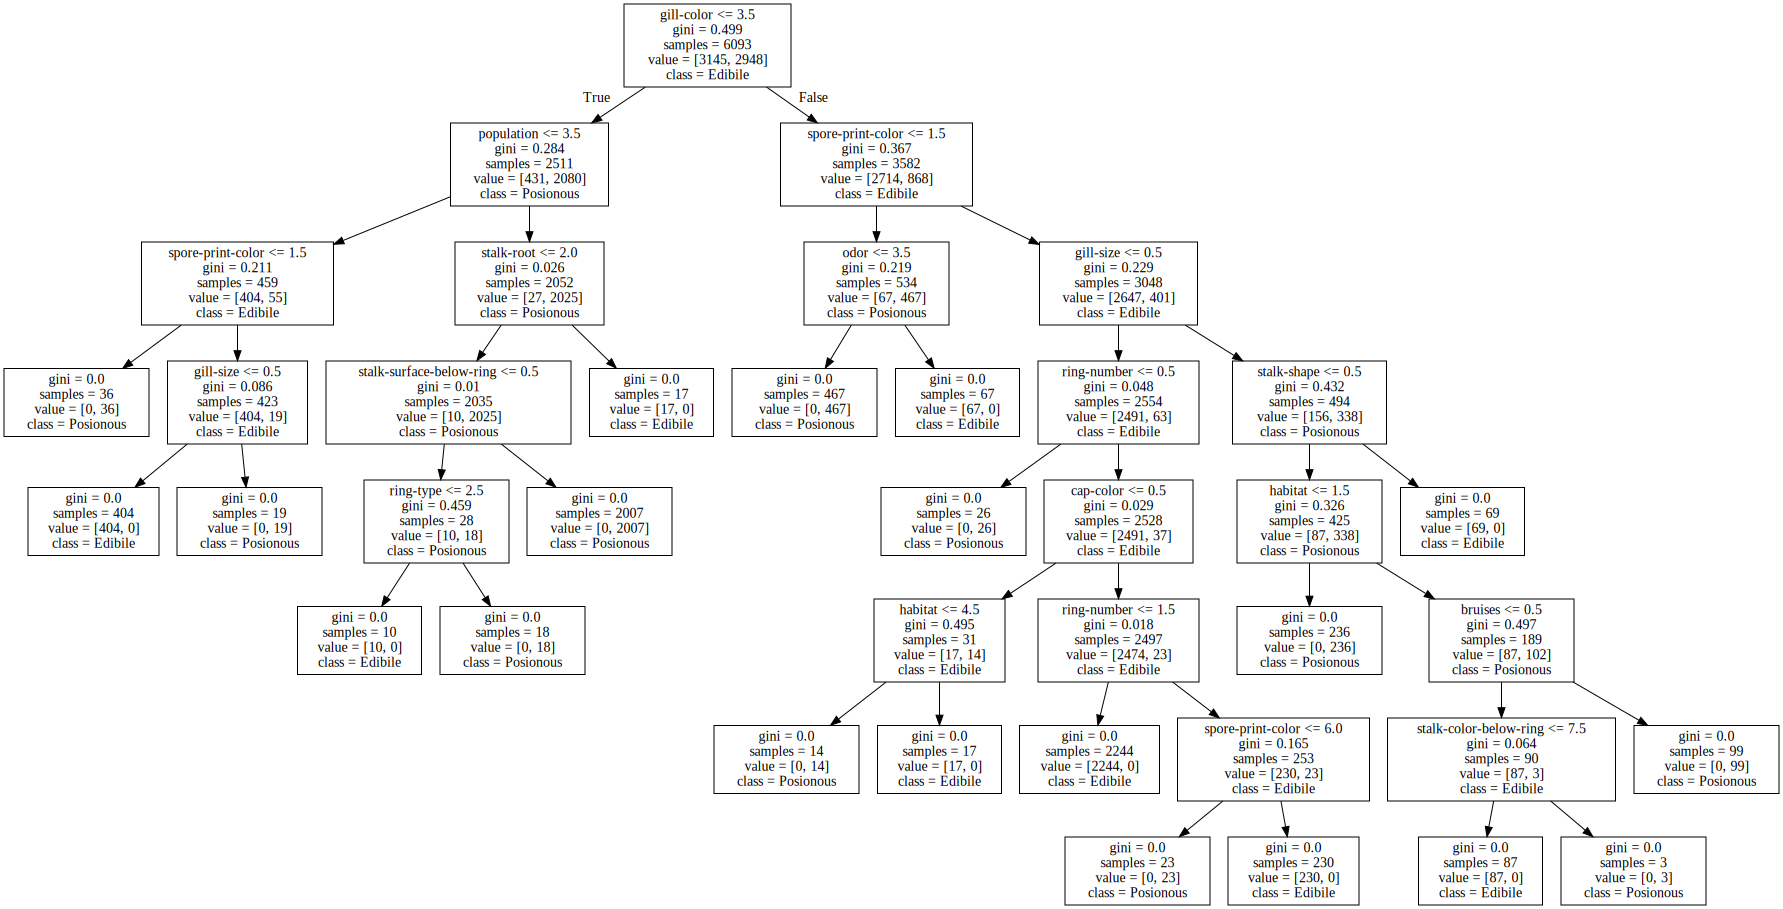

In [14]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file = None ,feature_names=columns,class_names=["Edibile","Posionous"])
graph = graphviz.Source(dot_data)
graph.render("class")
graph